# **Medical Cost Personal Datasets**

## **1.Problem Definition**

Build a linear model to predict a medical price for patients.

## **2.Data**


The data is downloaded from Kaggle :https://www.kaggle.com/datasets/mirichoi0218/insurance/data

## **3.Features**

* **age :** age of primary beneficiary

* **sex :** insurance contractor gender, female, male

* **bmi :** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* **children :** Number of children covered by health insurance / Number of dependents

* **smoker :** Smoking

* **region :** the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* **charges :** Individual medical costs billed by health insurance

# **4.Evaluation**

Build a linear machine learning model to predict the price of medical costs for patients.

The target or accuracy of the model is 95%.

# **5.Modelling**

**Importing a library's**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**Importing a Data**

In [2]:
data=pd.read_csv("insurance.csv")

**Search a data if any null values is occur **

In [3]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Information of the data**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Describe the data**

In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-6-b401709241e1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  price=data.corr()


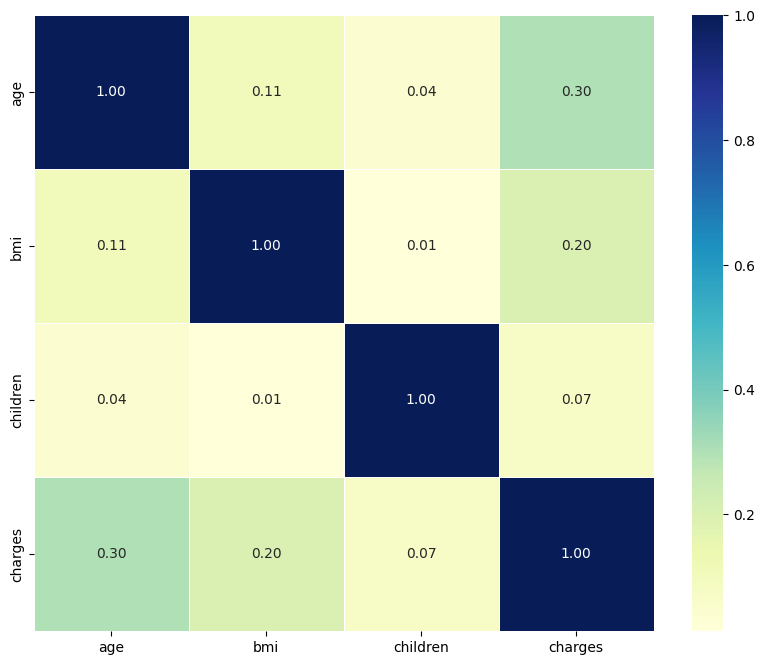

In [6]:
price=data.corr()
fig,ax=plt.subplots(figsize=(10,8))
sns.heatmap(price,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu",ax=ax,annot_kws={"size":10})
plt.show()

**Smoker column value counts**

In [7]:
data.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

**region column value counts**

In [8]:
data.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

** Sex column value counts**

In [9]:
data.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

**Importing Labelencoder libary**

In [10]:
from sklearn.preprocessing import LabelEncoder

**Transforming a data into number**

In [11]:
np.random.seed(42)
label=LabelEncoder()
data["labeled_sex"]=label.fit_transform(data["sex"])
data["labeled_smoker"]=label.fit_transform(data["smoker"])
data["labeled_region"]=label.fit_transform(data["region"])

**View the data**

In [12]:
data

,age,sex,bmi,children,smoker,region,charges,labeled_sex,labeled_smoker,labeled_region
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,2
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,3


**Drop the object columns**

In [13]:
data.drop(["sex"],axis=1,inplace=True)
data.drop(["region"],axis=1,inplace=True)
data.drop(["smoker"],axis=1,inplace=True)


**View a data**

In [14]:
data

,age,bmi,children,charges,labeled_sex,labeled_smoker,labeled_region
0,19,27.900,0,16884.92400,0,1,3
1,18,33.770,1,1725.55230,1,0,2
2,28,33.000,3,4449.46200,1,0,2
3,33,22.705,0,21984.47061,1,0,1
4,32,28.880,0,3866.85520,1,0,1
...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1
1334,18,31.920,0,2205.98080,0,0,0
1335,18,36.850,0,1629.83350,0,0,2
1336,21,25.800,0,2007.94500,0,0,3


**Importing LinearRegression model and train test split**

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

**Split data into x and y**
**X are Features and Y are Targets**

In [16]:
x=data.drop(["charges"],axis=1)
y=data["charges"]

**Viewing X Columns**

In [17]:
x

,age,bmi,children,labeled_sex,labeled_smoker,labeled_region
0,19,27.900,0,0,1,3
1,18,33.770,1,1,0,2
2,28,33.000,3,1,0,2
3,33,22.705,0,1,0,1
4,32,28.880,0,1,0,1
...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1
1334,18,31.920,0,0,0,0
1335,18,36.850,0,0,0,2
1336,21,25.800,0,0,0,3


**View a target columns**

In [18]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

**Split a data into training sets, validation sets and testing sets**

In [19]:
x_train,x_valid_test,y_train,y_valid_test=train_test_split(x,y,test_size=0.3)

x_valid,x_test,y_valid,y_test=train_test_split(x_valid_test,y_valid_test,test_size=0.5)

**Counts the length of X training,validation and test sets**

In [20]:
len(x_train),len(x_valid),len(x_test)

(936, 201, 201)

**Counts the Length of Y training, validations and test sets**

In [21]:
len(y_train),len(y_valid),len(y_test)

(936, 201, 201)

**Sets a random seed & fit a linear model**

In [22]:
np.random.seed(42)
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

**Score of validation sets**

In [23]:
lr.score(x_valid,y_valid)

0.7979982919805453

**Importing a metrics**

In [24]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

**Create the function for metrics**

In [25]:
def evaluation_score(y_true,y_preds):
  r2=r2_score(y_true,y_preds)
  mae=mean_absolute_error(y_true,y_preds)
  mse=mean_squared_error(y_true,y_preds)
  dict_metrics={"r2_score":round(r2,2),
                "mean_squared_error":round(mse,2),
                "mean_absoluated_error":round(mae,2)}
  print(f"the r2 score of the model{r2*100:.2f}%")
  print(f"the mean absoluated error of the model{mae}")
  print(f"the squared error of the model{mse}")
  return dict_metrics

**Predicted a x_test and save into y_preds**

In [26]:
y_preds=lr.predict(x_test)

**linaer model metrics score**

In [27]:
baseline_modelscore=evaluation_score(y_test,y_preds)

the r2 score of the model73.11%
the mean absoluated error of the model4210.536555111456
the squared error of the model34761600.797981426


**HyperTurning using RandomizedSearchCV**

In [28]:
from sklearn.model_selection import RandomizedSearchCV

**create a dictionary for Turning linear model parameter**

In [29]:
grid={"copy_X":[True,False],
      "n_jobs":[None,1,-1],
      "fit_intercept":[False,True]}

In [30]:
linear=LinearRegression()

**Sets the params of RandomizedSearchCV**

In [31]:
rand=RandomizedSearchCV(linear, param_distributions=grid, cv=5, n_iter=10,verbose=True)

**Fiting a x_train and Y_train sets**

In [32]:
rand.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LinearRegression(),
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [False, True],
                                        'n_jobs': [None, 1, -1]},
                   verbose=True)

**Score of training sets**

In [33]:
rand.score(x_train,y_train)

0.7422571320172101

**Score of validation sets**

In [34]:
rand.score(x_valid,y_valid)

0.7979982919805453

**Best params of RandomizedsearchCV using Linear model**

In [35]:
rand.best_params_

{'n_jobs': 1, 'fit_intercept': True, 'copy_X': False}

**Predict a x_test**

In [36]:
y_preds=rand.predict(x_test)

**RandomizedSearchCV metrics scores**

In [37]:
rand_metrics=evaluation_score(y_test,y_preds)

the r2 score of the model73.11%
the mean absoluated error of the model4210.536555111456
the squared error of the model34761600.797981426


**Importing a GridSearchCV**

In [38]:
from sklearn.model_selection import GridSearchCV

**Create a dictoniary of linear model best params using randomizedsearchcv params**

In [39]:
grid_2={"n_jobs":[-1,1,None],
        "fit_intercept":[True,False],
        "copy_X":[True,False]}

In [40]:
grid=GridSearchCV(linear,param_grid=grid_2,cv=5,verbose=True)

**Fitting a training sets**

In [41]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [-1, 1, None]},
             verbose=True)

**Predict the x_test**

In [42]:
y_preds=grid.predict(x_test)

**Metrics score gridsearchcv in linear model**

In [43]:
grid_metrics=evaluation_score(y_test,y_preds)

the r2 score of the model73.11%
the mean absoluated error of the model4210.536555111456
the squared error of the model34761600.797981426


# **Features important of linear model**

In [44]:
linear=LinearRegression(n_jobs= -1, fit_intercept= True, copy_X= True)

In [45]:
linear.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

**Linear model features important of the given datasets**

In [46]:
linear.coef_

array([  261.62568984,   344.54483066,   424.37016596,   109.64719595,
       23620.80252148,  -326.46262527])

In [47]:
features=dict(zip(data.columns,linear.coef_))

In [48]:
features=pd.DataFrame(features,index=[0])

**Plotting a features importance of the data**

<Axes: >

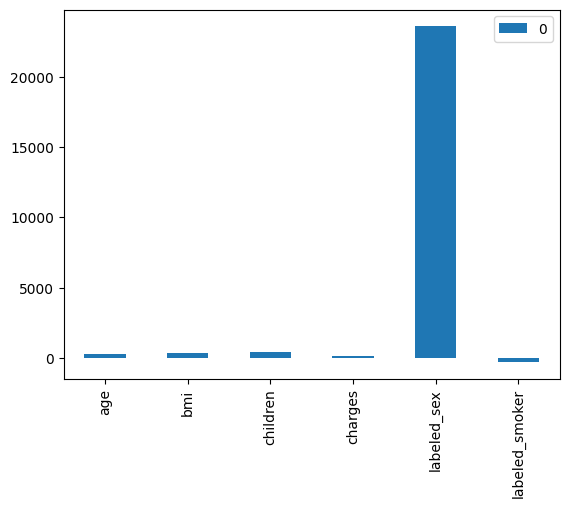

In [49]:
features.T.plot(kind="bar")

The given datasets to predict medical costs for patients using a linear model got 73.23% accuracy. There is no more turning data.

**I build a another RandomForest model to predict a medical cost for patients.**

**Importing a RandomForestRegressor model**

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
clf=RandomForestRegressor(random_state=42)

**Fitting a model**

In [52]:
clf.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

**Score of training sets**

In [53]:
clf.score(x_train,y_train)

0.9768408112958528

**Score of validation sets**

In [54]:
clf.score(x_valid,y_valid)

0.8913375895841185

**Predicting a x_test**

In [55]:
y_preds=clf.predict(x_test)

**Baseline score of RandomForestRegressor model**

In [56]:
random_metrics=evaluation_score(y_test,y_preds)

the r2 score of the model80.24%
the mean absoluated error of the model2715.4716174303476
the squared error of the model25544233.888149466


**Hyperturning using RandomizesdSearchCV**

In [57]:
grid={"n_estimators":[10,100,300,500,1000],
      "min_samples_split":[10,20,30],
      "min_samples_leaf":[1,3,5],
      "max_depth":[None,10,20,30]}

In [58]:
ra=RandomForestRegressor(random_state=42)

In [59]:
random_rand=RandomizedSearchCV(ra,param_distributions=grid,verbose=True,cv=5,n_iter=20)

**Fitting training sets**

In [60]:
random_rand.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 3, 5],
                                        'min_samples_split': [10, 20, 30],
                                        'n_estimators': [10, 100, 300, 500,
                                                         1000]},
                   verbose=True)

**Check the best params of the RandomizedSearchCV model**

In [61]:
random_rand.best_params_

{'n_estimators': 500,
 'min_samples_split': 20,
 'min_samples_leaf': 3,
 'max_depth': 20}

**Score of training sets**

In [62]:
random_rand.score(x_train,y_train)

0.8967784459066949

**Score of validation sets**

In [63]:
random_rand.score(x_valid,y_valid)

0.9014227694215362

**Predicted a x test**

In [64]:
y_preds=random_rand.predict(x_test)

**RandomizedSearchCV in RandomForestRegressor model score**

In [65]:
random_rand_metrics=evaluation_score(y_test,y_preds)

the r2 score of the model82.85%
the mean absoluated error of the model2590.5486804145416
the squared error of the model22162250.550028563


**Hyperturning a GridSearchCV**

In [66]:
grid_2={"n_estimators":[10,100,300],
        "min_samples_split":[10,20],
        "min_samples_leaf":[3,5],
        "max_depth":[None,10,20]}

In [67]:
random_grid=GridSearchCV(ra,param_grid=grid_2,verbose=True,cv=5)

In [68]:
random_grid.fit(x_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [3, 5],
                         'min_samples_split': [10, 20],
                         'n_estimators': [10, 100, 300]},
             verbose=True)

**The best params of GridSearchCV**

In [69]:
random_grid.best_params_

{'max_depth': None,
 'min_samples_leaf': 5,
 'min_samples_split': 20,
 'n_estimators': 300}

**Score of training sets**

In [70]:
random_grid.score(x_train,y_train)

0.8938710351578829

**Score of validation sets**

In [71]:
random_grid.score(x_valid,y_valid)

0.9025740448026371

In [72]:
y_preds=random_grid.predict(x_test)

**The GridsearchCV model metrics scores**

In [73]:
random_grid_metrics=evaluation_score(y_test,y_preds)

the r2 score of the model83.06%
the mean absoluated error of the model2566.5616438652237
the squared error of the model21895179.57565176


**RandomForestRegressor Features Importances**

In [74]:
clf=RandomForestRegressor(max_depth= None,min_samples_leaf= 5,min_samples_split= 20,n_estimators= 300)

**Fitting a training sets**

In [75]:
clf.fit(x_train,y_train)

RandomForestRegressor(min_samples_leaf=5, min_samples_split=20,
                      n_estimators=300)

In [76]:
clf.feature_importances_

array([0.12935281, 0.1796285 , 0.01074621, 0.00139745, 0.67381852,
       0.00505651])

In [77]:
random_features_importance=dict(zip(data.columns,clf.feature_importances_))
random_features_importance

{'age': 0.12935281201943546,
 'bmi': 0.17962849792214475,
 'children': 0.010746211146030107,
 'charges': 0.0013974491558449563,
 'labeled_sex': 0.6738185188960629,
 'labeled_smoker': 0.005056510860481886}

In [78]:
features=pd.DataFrame(random_features_importance,index=[0])

**Plotting a features importances of random forest model**

<Axes: >

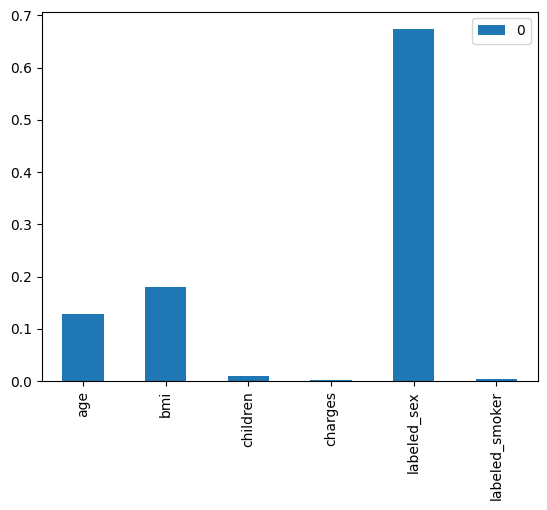

In [79]:
features.T.plot(kind="bar")

The given datasets to predict medical costs for patients using a RandomForestRegressor model got 83.06.% accuracy.